## BackTest: 이동평균선 모델의 수익성 검증

### 데이터 수집

In [1]:
from DataFetcher.Duration import Duration

duration = Duration(start="2015-01-01T00:00", end="2023-08-01T12:00", batch_size=1000, interval="DAY")

#### 최초 실행

In [3]:
from DataFetcher.DataFetcher import DataFetcher

dataFetcher = DataFetcher()

data = dataFetcher.get_bitcoin_candle(duration=duration)
data_mal = data.copy()

data_mal.to_csv(f"./data/{str(duration.start).split()[0]}~{str(duration.end).split()[0]}.csv", encoding="utf8")

#### csv 로드

In [2]:
import pandas as pd

data_mal = pd.read_csv("./data/2015-01-01~2023-08-01.csv", encoding="utf8")

### 이동평균선 모델 불러오기

In [3]:
from models.MAL import MAL_model

model = MAL_model(data_mal, duration, target_label="price_close", timestamp_label="time_period_start")

In [4]:
model.add_mal(inplace=True)

,Unnamed: 0,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count,MAL_5DAY,MAL_20DAY,MAL_60DAY,MAL_120DAY,MAL_240DAY
0,0,2015-01-01T00:00:00.0000000Z,2015-01-02T00:00:00.0000000Z,2015-01-01T00:00:22.3630000Z,2015-01-01T23:59:00.9170000Z,321.00,321.00,312.60,313.81,3087.436554,2350,NaN,NaN,NaN,NaN,NaN
1,1,2015-01-02T00:00:00.0000000Z,2015-01-03T00:00:00.0000000Z,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0,NaN,NaN,NaN,NaN,NaN
2,2,2015-01-03T00:00:00.0000000Z,2015-01-04T00:00:00.0000000Z,2015-01-03T00:00:08.1130000Z,2015-01-03T23:59:59.5700000Z,315.42,316.58,280.00,282.00,21752.719146,10301,NaN,NaN,NaN,NaN,NaN
3,3,2015-01-04T00:00:00.0000000Z,2015-01-05T00:00:00.0000000Z,2015-01-04T00:00:01.1170000Z,2015-01-04T23:58:36.2400000Z,280.00,289.39,255.00,264.00,41441.278553,16535,NaN,NaN,NaN,NaN,NaN
4,4,2015-01-05T00:00:00.0000000Z,2015-01-06T00:00:00.0000000Z,2015-01-05T00:00:12.3170000Z,2015-01-05T09:12:25.6470000Z,264.55,280.00,264.07,276.80,9528.271002,4321,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,3127,2023-07-28T00:00:00.0000000Z,2023-07-29T00:00:00.0000000Z,2023-07-28T00:00:04.8330000Z,2023-07-28T23:59:59.0390000Z,29214.00,29525.00,29121.00,29317.00,1241.477541,8491,29258.2,29988.25,NaN,NaN,NaN
3128,3128,2023-07-29T00:00:00.0000000Z,2023-07-30T00:00:00.0000000Z,2023-07-29T00:00:03.9510000Z,2023-07-29T23:59:43.2670000Z,29316.00,29404.00,29251.00,29360.00,402.062376,5460,29294.8,29947.90,NaN,NaN,NaN
3129,3129,2023-07-30T00:00:00.0000000Z,2023-07-31T00:00:00.0000000Z,2023-07-30T00:00:04.1890000Z,2023-07-30T23:59:46.9640000Z,29360.00,29446.00,29034.00,29279.00,792.178886,7460,29305.8,29890.80,NaN,NaN,NaN
3130,3130,2023-07-31T00:00:00.0000000Z,2023-08-01T00:00:00.0000000Z,2023-07-31T00:00:02.1530000Z,2023-07-31T23:59:28.4230000Z,29279.00,29511.00,29115.00,29231.00,899.870884,8819,29281.2,29821.30,NaN,NaN,NaN


<Axes: >

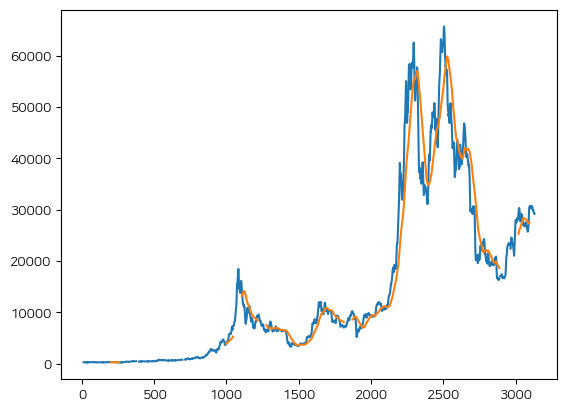

In [8]:
model.data["MAL_5DAY"].plot()
model.data["MAL_60DAY"].plot()

In [ ]:
class BackTest():
    def __init__(self):
        pass


    def do_test(self):
        pass